# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lib for Data Analysis
import pandas as pd 
import numpy as np
from sklearn import metrics

# Lib for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
full_data = pd.read_csv('./drive/MyDrive/Data/hw_counts.csv') 

In [ ]:
full_data.head()

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,Hardware Event Count:UOPS_EXECUTED.THREAD,Hardware Event Count:UOPS_EXECUTED.X87,Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH,Hardware Event Count:UOPS_RETIRED.MACRO_FUSED,Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES,Hardware Event Count:FP_ASSIST.ANY,Hardware Event Count:INST_RETIRED.NOP,Hardware Event Count:OTHER_ASSISTS.ANY,label_model_name,label_model_family
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,42864064296,0,0,3268004902,6262540904,0,114000171,0,densenet_121,densenet
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,57076085614,0,0,4142006213,8056181260,0,152000228,0,densenet_169,densenet
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,55366083049,0,0,4142006213,7942178695,0,152000228,0,densenet_201,densenet
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,25118037677,0,0,2052003078,3891287552,0,38000057,0,mobilenet_v1,mobilenet
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,25726038589,0,0,2166003249,4012890288,0,38000057,0,mobilenet_v2,mobilenet


In [ ]:
full_data.shape

(120, 112)

In [ ]:
for col in full_data.columns: print(col)

Hardware Event Count:INST_RETIRED.ANY
Hardware Event Count:CPU_CLK_UNHALTED.THREAD
Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC
Hardware Event Count:INST_RETIRED.PREC_DIST
Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM
Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY
Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS
Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS
Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS
Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS
Hardware Event Count:FRONTEND_RETIRED.L2_MISS_PS
Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_16_PS
Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_2_BUBBLES_GE_1_PS
Hardware Event Count:FRONTEND_RETIRED.STLB_MISS_PS
Hardware Event Count:MEM_INST_RETIRED.ALL_STORES_PS
Hardware Event Count:MEM_INST_RETIRED.LOCK_LOADS_PS
Hardware Event Count:MEM_INST_RETIRED.SPLIT_LOADS_PS
Hardware Event Count:CPU_CLK_UNHALTED.REF_XCLK
Hardware Event Count:CPU_CLK_UNHALTED.ONE_THREAD_ACTIVE
Ha

In [ ]:
data_name_label = full_data.drop(columns =['label_model_family'])

In [ ]:
data_family_label = full_data.drop(columns =['label_model_name'])

In [ ]:
data_family_label.head()

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,Hardware Event Count:UOPS_EXECUTED.CORE_CYCLES_NONE,Hardware Event Count:UOPS_EXECUTED.THREAD,Hardware Event Count:UOPS_EXECUTED.X87,Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH,Hardware Event Count:UOPS_RETIRED.MACRO_FUSED,Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES,Hardware Event Count:FP_ASSIST.ANY,Hardware Event Count:INST_RETIRED.NOP,Hardware Event Count:OTHER_ASSISTS.ANY,label_model_family
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,14250021375,42864064296,0,0,3268004902,6262540904,0,114000171,0,densenet
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,15314022971,57076085614,0,0,4142006213,8056181260,0,152000228,0,densenet
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,16796025194,55366083049,0,0,4142006213,7942178695,0,152000228,0,densenet
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,7714011571,25118037677,0,0,2052003078,3891287552,0,38000057,0,mobilenet
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,8018012027,25726038589,0,0,2166003249,4012890288,0,38000057,0,mobilenet


Text(0.5, 1.0, 'Distribution of models')

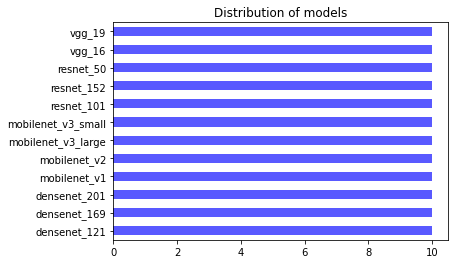

In [ ]:
data_name_label['label_model_name'].value_counts().plot(kind='barh', color = 'blue', alpha=.65)
# puts a title on our graph
plt.title("Distribution of models")  

Text(0.5, 1.0, 'Distribution of models')

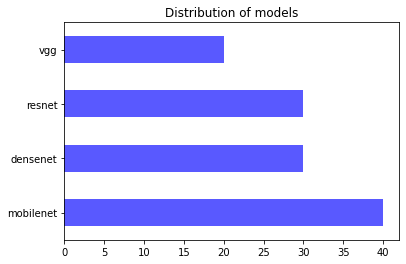

In [ ]:
data_family_label['label_model_family'].value_counts().plot(kind='barh', color = 'blue', alpha=.65)
# puts a title on our graph
plt.title("Distribution of models")  

In [ ]:
# One-hot encoding for each model

df_m_name = data_name_label
df_m_name
df_m_name_dummy = pd.get_dummies(df_m_name, columns = ['label_model_name'])

In [ ]:
df_m_name_dummy.head()

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,label_model_name_densenet_201,label_model_name_mobilenet_v1,label_model_name_mobilenet_v2,label_model_name_mobilenet_v3_large,label_model_name_mobilenet_v3_small,label_model_name_resnet_101,label_model_name_resnet_152,label_model_name_resnet_50,label_model_name_vgg_16,label_model_name_vgg_19
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,0,0,0,0,0,0,0,0,0,0
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,0,0,0,0,0,0,0,0,0,0
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,1,0,0,0,0,0,0,0,0,0
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,0,1,0,0,0,0,0,0,0,0
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# One-hot encoding for model family

df_family = data_family_label

In [ ]:
df_f_dummy= pd.get_dummies(df_family, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [ ]:
df_f = df_f_dummy
df_f.head() 

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH,Hardware Event Count:UOPS_RETIRED.MACRO_FUSED,Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES,Hardware Event Count:FP_ASSIST.ANY,Hardware Event Count:INST_RETIRED.NOP,Hardware Event Count:OTHER_ASSISTS.ANY,label_model_family_densenet,label_model_family_mobilenet,label_model_family_resnet,label_model_family_vgg
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,0,3268004902,6262540904,0,114000171,0,1,0,0,0
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,0,4142006213,8056181260,0,152000228,0,1,0,0,0
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,0,4142006213,7942178695,0,152000228,0,1,0,0,0
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,0,2052003078,3891287552,0,38000057,0,0,1,0,0
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,0,2166003249,4012890288,0,38000057,0,0,1,0,0


**Corr - target variable : Densenet family**

In [ ]:
df_f_dense = df_f.drop(columns =['label_model_family_mobilenet','label_model_family_resnet','label_model_family_vgg'])
df_f_dense

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,Hardware Event Count:UOPS_EXECUTED.CORE_CYCLES_NONE,Hardware Event Count:UOPS_EXECUTED.THREAD,Hardware Event Count:UOPS_EXECUTED.X87,Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH,Hardware Event Count:UOPS_RETIRED.MACRO_FUSED,Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES,Hardware Event Count:FP_ASSIST.ANY,Hardware Event Count:INST_RETIRED.NOP,Hardware Event Count:OTHER_ASSISTS.ANY,label_model_family_densenet
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,14250021375,42864064296,0,0,3268004902,6262540904,0,114000171,0,1
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,15314022971,57076085614,0,0,4142006213,8056181260,0,152000228,0,1
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,16796025194,55366083049,0,0,4142006213,7942178695,0,152000228,0,1
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,7714011571,25118037677,0,0,2052003078,3891287552,0,38000057,0,0
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,8018012027,25726038589,0,0,2166003249,4012890288,0,38000057,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,38580000000,32811000000,22296000000,36708055062,0,9006013509,264118487,144403249,2783694845,784754929,...,14440021660,52288078432,0,0,3724005586,6832553729,0,114000171,0,0
116,49881000000,42306000000,28818000000,51566077349,0,12882019323,402828196,167203762,3828767995,1073575145,...,17898026847,66158099237,0,0,4370006555,8420989468,0,152000228,0,0
117,26736000000,23379000000,15972000000,28766043149,0,7220010830,250817556,114002565,2164251487,581440698,...,10716016074,34618051927,0,0,2470003705,4681705336,0,38000057,0,0
118,41664000000,34941000000,23862000000,43016064524,0,12236018354,169111837,76001710,1677817439,475033250,...,14136021204,49590074385,0,0,2014003021,4522101745,0,38000057,0,0


In [ ]:
df_f_dense_cor= df_f_dense.corrwith(df_f_dense['label_model_family_densenet'], method='pearson')
df_f_dense_cor.head

<bound method NDFrame.head of Hardware Event Count:INST_RETIRED.ANY                                                  0.304840
Hardware Event Count:CPU_CLK_UNHALTED.THREAD                                           0.337898
Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC                                          0.323704
Hardware Event Count:INST_RETIRED.PREC_DIST                                            0.310527
Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM         NaN
                                                                                         ...   
Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES                                      0.624047
Hardware Event Count:FP_ASSIST.ANY                                                    -0.037987
Hardware Event Count:INST_RETIRED.NOP                                                  0.575694
Hardware Event Count:OTHER_ASSISTS.ANY                                                      NaN
label_mode

In [ ]:
df_f_dense_cor.sort_values()

Hardware Event Count:L1D_PEND_MISS.FB_FULL:cmask=1              -0.284592
Hardware Event Count:MEM_INST_RETIRED.SPLIT_LOADS_PS            -0.272308
Hardware Event Count:LD_BLOCKS.STORE_FORWARD                    -0.270170
Hardware Event Count:OFFCORE_REQUESTS_BUFFER.SQ_FULL            -0.244236
Hardware Event Count:FP_ARITH_INST_RETIRED.256B_PACKED_SINGLE   -0.216055
                                                                   ...   
Hardware Event Count:FP_ARITH_INST_RETIRED.SCALAR_DOUBLE              NaN
Hardware Event Count:ROB_MISC_EVENTS.PAUSE_INST                       NaN
Hardware Event Count:UOPS_EXECUTED.X87                                NaN
Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH                NaN
Hardware Event Count:OTHER_ASSISTS.ANY                                NaN
Length: 111, dtype: float64

In [ ]:
df_f_dense_cor.sort_values(ascending = False)

label_model_family_densenet                                 1.000000
Hardware Event Count:DTLB_STORE_MISSES.STLB_HIT:cmask=1     0.704750
Hardware Event Count:DTLB_LOAD_MISSES.STLB_HIT:cmask=1      0.691549
Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS           0.690657
Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS       0.684153
                                                              ...   
Hardware Event Count:FP_ARITH_INST_RETIRED.SCALAR_DOUBLE         NaN
Hardware Event Count:ROB_MISC_EVENTS.PAUSE_INST                  NaN
Hardware Event Count:UOPS_EXECUTED.X87                           NaN
Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH           NaN
Hardware Event Count:OTHER_ASSISTS.ANY                           NaN
Length: 111, dtype: float64

**Corr - target variable : densenet_121**

In [ ]:
df_m_name_dummy
df_name_dens121 = df_m_name_dummy.drop(columns =['label_model_name_densenet_169',	'label_model_name_densenet_201','label_model_name_mobilenet_v1',	'label_model_name_mobilenet_v2',	'label_model_name_mobilenet_v3_large','label_model_name_mobilenet_v3_small',	'label_model_name_resnet_101',	'label_model_name_resnet_152',	'label_model_name_resnet_50',	'label_model_name_vgg_16',	'label_model_name_vgg_19'])
df_name_dens121

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,Hardware Event Count:UOPS_EXECUTED.CORE_CYCLES_NONE,Hardware Event Count:UOPS_EXECUTED.THREAD,Hardware Event Count:UOPS_EXECUTED.X87,Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH,Hardware Event Count:UOPS_RETIRED.MACRO_FUSED,Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES,Hardware Event Count:FP_ASSIST.ANY,Hardware Event Count:INST_RETIRED.NOP,Hardware Event Count:OTHER_ASSISTS.ANY,label_model_name_densenet_121
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,14250021375,42864064296,0,0,3268004902,6262540904,0,114000171,0,1
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,15314022971,57076085614,0,0,4142006213,8056181260,0,152000228,0,0
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,16796025194,55366083049,0,0,4142006213,7942178695,0,152000228,0,0
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,7714011571,25118037677,0,0,2052003078,3891287552,0,38000057,0,0
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,8018012027,25726038589,0,0,2166003249,4012890288,0,38000057,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,38580000000,32811000000,22296000000,36708055062,0,9006013509,264118487,144403249,2783694845,784754929,...,14440021660,52288078432,0,0,3724005586,6832553729,0,114000171,0,0
116,49881000000,42306000000,28818000000,51566077349,0,12882019323,402828196,167203762,3828767995,1073575145,...,17898026847,66158099237,0,0,4370006555,8420989468,0,152000228,0,0
117,26736000000,23379000000,15972000000,28766043149,0,7220010830,250817556,114002565,2164251487,581440698,...,10716016074,34618051927,0,0,2470003705,4681705336,0,38000057,0,0
118,41664000000,34941000000,23862000000,43016064524,0,12236018354,169111837,76001710,1677817439,475033250,...,14136021204,49590074385,0,0,2014003021,4522101745,0,38000057,0,0


In [ ]:
df_name_dens121_cor= df_name_dens121.corrwith(df_name_dens121['label_model_name_densenet_121'], method='pearson')
df_name_dens121_cor.head()

Hardware Event Count:INST_RETIRED.ANY                                                 -0.035800
Hardware Event Count:CPU_CLK_UNHALTED.THREAD                                          -0.029441
Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC                                         -0.033755
Hardware Event Count:INST_RETIRED.PREC_DIST                                           -0.037286
Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM         NaN
dtype: float64

In [ ]:
df_name_dens121_cor.sort_values()

Hardware Event Count:LD_BLOCKS.STORE_FORWARD               -0.191148
Hardware Event Count:MEM_INST_RETIRED.SPLIT_LOADS_PS       -0.184285
Hardware Event Count:L1D_PEND_MISS.FB_FULL:cmask=1         -0.160647
Hardware Event Count:MEM_LOAD_L3_HIT_RETIRED.XSNP_HIT_PS   -0.152759
Hardware Event Count:IDQ.ALL_DSB_CYCLES_4_UOPS             -0.147754
                                                              ...   
Hardware Event Count:FP_ARITH_INST_RETIRED.SCALAR_DOUBLE         NaN
Hardware Event Count:ROB_MISC_EVENTS.PAUSE_INST                  NaN
Hardware Event Count:UOPS_EXECUTED.X87                           NaN
Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH           NaN
Hardware Event Count:OTHER_ASSISTS.ANY                           NaN
Length: 111, dtype: float64

In [ ]:
df_name_dens121_cor.sort_values(ascending = False)

label_model_name_densenet_121                               1.000000
Hardware Event Count:DTLB_LOAD_MISSES.STLB_HIT:cmask=1      0.233564
Hardware Event Count:FRONTEND_RETIRED.L2_MISS_PS            0.219885
Hardware Event Count:MACHINE_CLEARS.COUNT                   0.219458
Hardware Event Count:LSD.CYCLES_ACTIVE                      0.196267
                                                              ...   
Hardware Event Count:FP_ARITH_INST_RETIRED.SCALAR_DOUBLE         NaN
Hardware Event Count:ROB_MISC_EVENTS.PAUSE_INST                  NaN
Hardware Event Count:UOPS_EXECUTED.X87                           NaN
Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH           NaN
Hardware Event Count:OTHER_ASSISTS.ANY                           NaN
Length: 111, dtype: float64

**Corr - target variable : Mobile_v2**

In [ ]:
df_m_name_dummy
df_name_mobileV2 = df_m_name_dummy.drop(columns =['label_model_name_densenet_121','label_model_name_densenet_169',	'label_model_name_densenet_201','label_model_name_mobilenet_v1',	'label_model_name_mobilenet_v3_large','label_model_name_mobilenet_v3_small',	'label_model_name_resnet_101',	'label_model_name_resnet_152',	'label_model_name_resnet_50',	'label_model_name_vgg_16',	'label_model_name_vgg_19'])
df_name_mobileV2.head()

,Hardware Event Count:INST_RETIRED.ANY,Hardware Event Count:CPU_CLK_UNHALTED.THREAD,Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC,Hardware Event Count:INST_RETIRED.PREC_DIST,Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM,Hardware Event Count:CYCLE_ACTIVITY.STALLS_MEM_ANY,Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS,Hardware Event Count:BR_MISP_RETIRED.ALL_BRANCHES_PS,Hardware Event Count:FRONTEND_RETIRED.ANY_DSB_MISS,Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS,...,Hardware Event Count:UOPS_EXECUTED.CORE_CYCLES_NONE,Hardware Event Count:UOPS_EXECUTED.THREAD,Hardware Event Count:UOPS_EXECUTED.X87,Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH,Hardware Event Count:UOPS_RETIRED.MACRO_FUSED,Hardware Event Count:BR_INST_RETIRED.ALL_BRANCHES,Hardware Event Count:FP_ASSIST.ANY,Hardware Event Count:INST_RETIRED.NOP,Hardware Event Count:OTHER_ASSISTS.ANY,label_model_name_mobilenet_v2
0,32940000000,30555000000,20649000000,30590045885,0,8930013395,332523275,159603591,3131419184,932965303,...,14250021375,42864064296,0,0,3268004902,6262540904,0,114000171,0,0
1,39426000000,33867000000,22683000000,41154061731,0,9348014022,372426068,174803933,3906673448,1014671022,...,15314022971,57076085614,0,0,4142006213,8056181260,0,152000228,0,0
2,45723000000,38679000000,25953000000,46588069882,0,10678016017,429430058,205204617,4461512284,1181882726,...,16796025194,55366083049,0,0,4142006213,7942178695,0,152000228,0,0
3,17760000000,16002000000,10800000000,14972022458,0,5016007524,190013300,83601881,1527706932,473133117,...,7714011571,25118037677,0,0,2052003078,3891287552,0,38000057,0,0
4,20457000000,18057000000,12138000000,20900031350,0,5016007524,201414098,91202052,2029342044,570039900,...,8018012027,25726038589,0,0,2166003249,4012890288,0,38000057,0,1


In [ ]:
df_name_mobile2_cor= df_name_mobileV2.corrwith(df_name_mobileV2['label_model_name_mobilenet_v2'], method='pearson')
df_name_mobile2_cor.head()

Hardware Event Count:INST_RETIRED.ANY                                                 -0.365714
Hardware Event Count:CPU_CLK_UNHALTED.THREAD                                          -0.368752
Hardware Event Count:CPU_CLK_UNHALTED.REF_TSC                                         -0.368484
Hardware Event Count:INST_RETIRED.PREC_DIST                                           -0.336308
Hardware Event Count:OFFCORE_RESPONSE:request=DEMAND_RFO:response=L3_HIT.SNOOP_HITM         NaN
dtype: float64

In [ ]:
df_name_mobile2_cor.sort_values()

Hardware Event Count:UOPS_ISSUED.ANY                                    -0.381898
Hardware Event Count:UOPS_RETIRED.RETIRE_SLOTS                          -0.380323
Hardware Event Count:OFFCORE_REQUESTS_OUTSTANDING.ALL_DATA_RD:cmask=4   -0.380008
Hardware Event Count:MEM_LOAD_RETIRED.L1_HIT_PS                         -0.379694
Hardware Event Count:MEM_INST_RETIRED.ANY                               -0.372648
                                                                           ...   
Hardware Event Count:FP_ARITH_INST_RETIRED.SCALAR_DOUBLE                      NaN
Hardware Event Count:ROB_MISC_EVENTS.PAUSE_INST                               NaN
Hardware Event Count:UOPS_EXECUTED.X87                                        NaN
Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH                        NaN
Hardware Event Count:OTHER_ASSISTS.ANY                                        NaN
Length: 111, dtype: float64

In [ ]:
df_name_mobile2_cor.sort_values(ascending = False)

label_model_name_mobilenet_v2                                1.000000
Hardware Event Count:MEM_INST_RETIRED.SPLIT_STORES_PS       -0.004735
Hardware Event Count:MEM_LOAD_L3_HIT_RETIRED.XSNP_MISS_PS   -0.027335
Hardware Event Count:LSD.CYCLES_ACTIVE                      -0.039253
Hardware Event Count:FRONTEND_RETIRED.STLB_MISS_PS          -0.041358
                                                               ...   
Hardware Event Count:FP_ARITH_INST_RETIRED.SCALAR_DOUBLE          NaN
Hardware Event Count:ROB_MISC_EVENTS.PAUSE_INST                   NaN
Hardware Event Count:UOPS_EXECUTED.X87                            NaN
Hardware Event Count:UOPS_ISSUED.VECTOR_WIDTH_MISMATCH            NaN
Hardware Event Count:OTHER_ASSISTS.ANY                            NaN
Length: 111, dtype: float64


As a result of repetition, when the target variable is a model family, the four variables with the highest correlation coefficient are as follows:


Hardware Event Count:DTLB_STORE_MISSES.STLB_HIT:cmask=1     

Hardware Event Count:DTLB_LOAD_MISSES.STLB_HIT:cmask=1      

Hardware Event Count:FRONTEND_RETIRED.DSB_MISS_PS           

Hardware Event Count:FRONTEND_RETIRED.LATENCY_GE_4_PS      



When the target variable is each model name, the four variables with the highest correlation coefficient are different. 

# Classifer - Evaluation

** Target val: model_family**

In [ ]:
# Target var = Model family

df_f_final2 = df_family

In [ ]:
# Label Encoder
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df_f_final['label_model_family'] = le.fit_transform(df_f_final['label_model_family'])

In [ ]:
# Selection of data and target
# In the code x represent data and y represent target
# # df_f_final2

x= df_f_final2.iloc[:, df_f_final2.columns != 'label_model_family']
y= df_f_final2.iloc[:, 110]

In [ ]:
#import the necessary module to train-test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3)
print("Shape of data training set {}".format(x_train.shape))    
print("Shape of data test set {}".format(x_test.shape)) 
print("Shape of target training set {}".format(y_train.shape)) 
print("Shape of target test set {}".format(y_train.shape)) 

Shape of data training set (84, 110)
Shape of data test set (36, 110)
Shape of target training set (84,)
Shape of target test set (84,)


# Modeling using Raw data

['resnet' 'densenet' 'densenet' 'mobilenet' 'densenet' 'resnet' 'densenet'
 'vgg' 'vgg' 'densenet' 'densenet' 'mobilenet' 'mobilenet' 'densenet'
 'vgg' 'mobilenet' 'densenet' 'resnet' 'mobilenet' 'resnet' 'densenet'
 'vgg' 'mobilenet' 'resnet' 'mobilenet' 'vgg' 'resnet' 'mobilenet'
 'resnet' 'densenet' 'densenet' 'densenet' 'mobilenet' 'vgg' 'mobilenet'
 'mobilenet']
Random Forest Accuracy  1.0
[[12  0  0  0]
 [ 0 11  0  0]
 [ 0  0  7  0]
 [ 0  0  0  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0

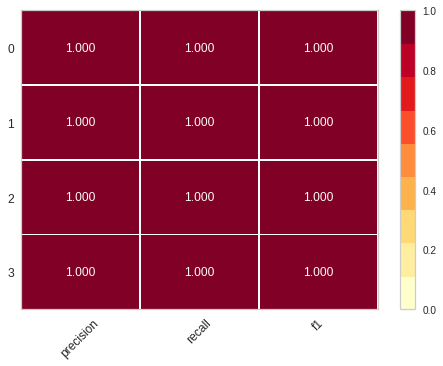

In [ ]:
# RF model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
random_forest = RandomForestClassifier(criterion="entropy", max_depth=3)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
random_forest.fit(x_train,y_train)
#prediction 
pred = random_forest.predict(x_test)
print(pred)

#print the accuracy score
print("Random Forest Accuracy ",accuracy_score(y_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(y_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(random_forest, classes=['0','1','2','3'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data

['resnet' 'densenet' 'densenet' 'mobilenet' 'resnet' 'resnet' 'densenet'
 'vgg' 'vgg' 'densenet' 'densenet' 'mobilenet' 'mobilenet' 'densenet'
 'vgg' 'mobilenet' 'densenet' 'resnet' 'mobilenet' 'resnet' 'densenet'
 'vgg' 'mobilenet' 'resnet' 'mobilenet' 'vgg' 'resnet' 'mobilenet'
 'resnet' 'densenet' 'densenet' 'densenet' 'mobilenet' 'vgg' 'mobilenet'
 'mobilenet']
Decision Tree Accuracy  0.9722222222222222
[[11  0  1  0]
 [ 0 11  0  0]
 [ 0  0  7  0]
 [ 0  0  0  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


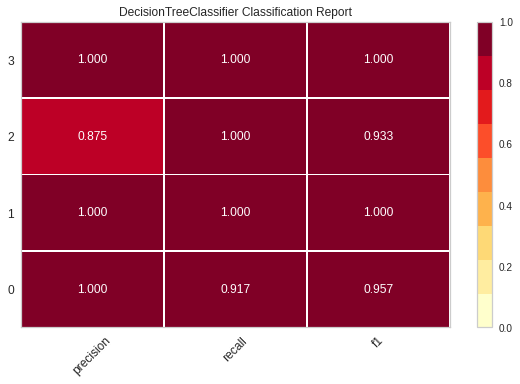

[Text(0.3333333333333333, 0.9, 'X[50] <= 12901019648.0\nentropy = 1.948\nsamples = 84\nvalue = [18, 29, 23, 14]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0, 0]'),
 Text(0.5, 0.7, 'X[12] <= 1137229568.0\nentropy = 1.556\nsamples = 55\nvalue = [18, 0, 23, 14]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14]'),
 Text(0.6666666666666666, 0.5, 'X[75] <= 95952876.0\nentropy = 0.989\nsamples = 41\nvalue = [18, 0, 23, 0]'),
 Text(0.5, 0.3, 'X[12] <= 1531507200.0\nentropy = 0.755\nsamples = 23\nvalue = [18, 0, 5, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 18, 0]')]

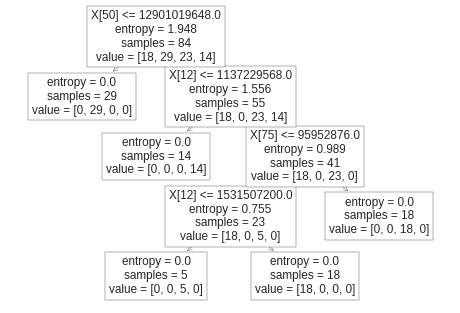

In [ ]:
# Decision Tree

#import the necessary module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
dec_tree.fit(x_train,y_train)
#prediction 
pred = dec_tree.predict(x_test)
print(pred)

#print the accuracy score
print("Decision Tree Accuracy ",accuracy_score(y_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(y_test,pred))


from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dec_tree, classes=['0','1','2','3'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


from sklearn import tree
tree.plot_tree(dec_tree)

['resnet' 'densenet' 'densenet' 'mobilenet' 'densenet' 'resnet' 'densenet'
 'vgg' 'vgg' 'densenet' 'densenet' 'mobilenet' 'mobilenet' 'densenet'
 'vgg' 'mobilenet' 'densenet' 'resnet' 'mobilenet' 'resnet' 'densenet'
 'vgg' 'mobilenet' 'resnet' 'mobilenet' 'vgg' 'resnet' 'mobilenet'
 'resnet' 'densenet' 'densenet' 'densenet' 'mobilenet' 'vgg' 'mobilenet'
 'mobilenet']
K-Nearest Neighbors Accuracy 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


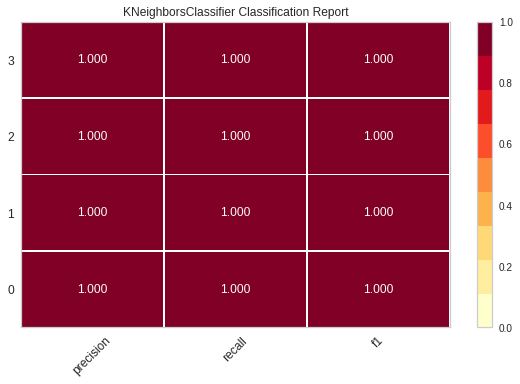

In [ ]:
# KNN (K-Nearest Neighbors)

#import the necessary module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logmodel=KNeighborsClassifier()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
print(y_pred)

#print the accuracy score
print("K-Nearest Neighbors Accuracy",accuracy_score(y_test,y_pred,normalize = True))


#code for confusion matrix
confusion_matrix(y_test,y_pred)

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(logmodel, classes=['0','1','2','3'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

## Modeling using preprocessed data

In [ ]:
df_process = pd.read_csv('./drive/MyDrive/Data/prepro_data.csv') 

In [ ]:
x= df_process.iloc[:, df_process.columns !=  'label_model_family']
x = x.drop(columns =['label_model_name'])
y= df_process.iloc[:, 111]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3)
print("Shape of data training set {}".format(x_train.shape))    
print("Shape of data test set {}".format(x_test.shape)) 
print("Shape of target training set {}".format(y_train.shape)) 
print("Shape of target test set {}".format(y_train.shape)) 

Shape of data training set (84, 110)
Shape of data test set (36, 110)
Shape of target training set (84,)
Shape of target test set (84,)


['mobilenet' 'mobilenet' 'densenet' 'densenet' 'densenet' 'densenet' 'vgg'
 'resnet' 'mobilenet' 'resnet' 'resnet' 'mobilenet' 'densenet' 'mobilenet'
 'vgg' 'densenet' 'vgg' 'resnet' 'vgg' 'resnet' 'resnet' 'resnet'
 'mobilenet' 'vgg' 'mobilenet' 'densenet' 'densenet' 'mobilenet' 'vgg'
 'mobilenet' 'densenet' 'mobilenet' 'vgg' 'vgg' 'densenet' 'densenet']
Random Forest Accuracy  0.9166666666666666
[[ 9  0  1  0]
 [ 0 10  0  0]
 [ 2  0  6  0]
 [ 0  0  0  8]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9166666666666666

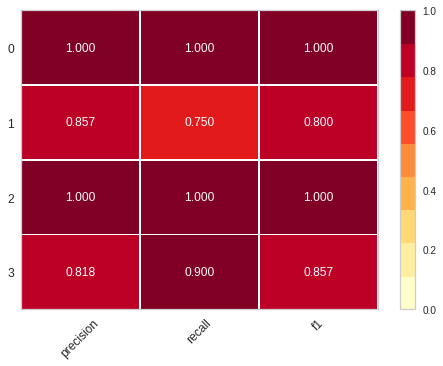

In [ ]:
# RF model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
random_forest = RandomForestClassifier(criterion="entropy", max_depth=3)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
random_forest.fit(x_train,y_train)
#prediction 
pred = random_forest.predict(x_test)
print(pred)

#print the accuracy score
print("Random Forest Accuracy ",accuracy_score(y_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(y_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(random_forest, classes=['0','1','2','3'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data

['mobilenet' 'mobilenet' 'densenet' 'densenet' 'densenet' 'resnet' 'vgg'
 'resnet' 'mobilenet' 'resnet' 'vgg' 'mobilenet' 'densenet' 'mobilenet'
 'vgg' 'densenet' 'vgg' 'resnet' 'vgg' 'resnet' 'resnet' 'resnet'
 'mobilenet' 'vgg' 'mobilenet' 'densenet' 'resnet' 'mobilenet' 'vgg'
 'mobilenet' 'densenet' 'mobilenet' 'vgg' 'vgg' 'resnet' 'densenet']
Decision Tree Accuracy  0.8611111111111112
[[ 7  0  3  0]
 [ 0 10  0  0]
 [ 1  0  6  1]
 [ 0  0  0  8]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


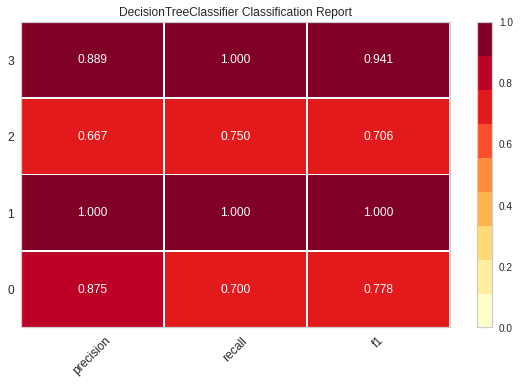

[Text(0.5, 0.875, 'X[37] <= -0.213\nentropy = 1.931\nsamples = 84\nvalue = [20, 30, 22, 12]'),
 Text(0.25, 0.625, 'X[102] <= -0.105\nentropy = 0.863\nsamples = 42\nvalue = [0, 30, 0, 12]'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0, 0]'),
 Text(0.375, 0.375, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'X[25] <= 0.064\nentropy = 0.998\nsamples = 42\nvalue = [20, 0, 22, 0]'),
 Text(0.625, 0.375, 'X[46] <= 0.182\nentropy = 0.276\nsamples = 21\nvalue = [20, 0, 1, 0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.75, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]')]

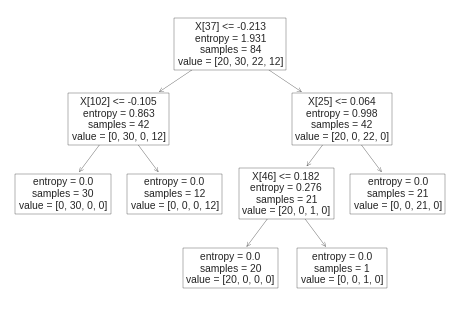

In [ ]:
# Decision Tree

#import the necessary module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
dec_tree.fit(x_train,y_train)
#prediction 
pred = dec_tree.predict(x_test)
print(pred)

#print the accuracy score
print("Decision Tree Accuracy ",accuracy_score(y_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(y_test,pred))


from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dec_tree, classes=['0','1','2','3'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


from sklearn import tree
tree.plot_tree(dec_tree)

['mobilenet' 'mobilenet' 'densenet' 'resnet' 'densenet' 'densenet' 'vgg'
 'densenet' 'mobilenet' 'resnet' 'resnet' 'mobilenet' 'densenet'
 'mobilenet' 'vgg' 'densenet' 'vgg' 'resnet' 'vgg' 'resnet' 'resnet'
 'resnet' 'mobilenet' 'vgg' 'mobilenet' 'densenet' 'resnet' 'mobilenet'
 'vgg' 'mobilenet' 'densenet' 'mobilenet' 'vgg' 'vgg' 'densenet'
 'densenet']
K-Nearest Neighbors Accuracy 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


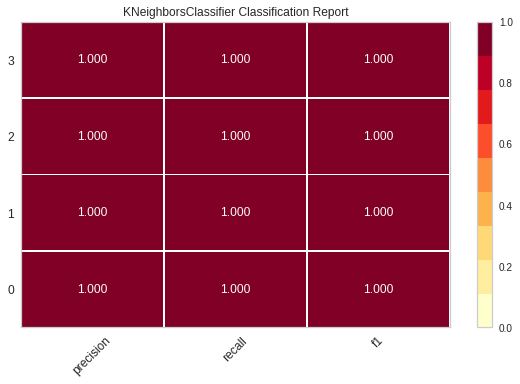

In [ ]:
# KNN (K-Nearest Neighbors)

#import the necessary module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logmodel=KNeighborsClassifier()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
print(y_pred)

#print the accuracy score
print("K-Nearest Neighbors Accuracy",accuracy_score(y_test,y_pred,normalize = True))


#code for confusion matrix
confusion_matrix(y_test,y_pred)

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(logmodel, classes=['0','1','2','3'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data